In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#importing the MSP dataset
msp_mandi = pd.read_csv('CMO_MSP_Mandi.csv')
msp_mandi.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


In [3]:
#This shows us the types of each crops and their counts 
msp_mandi.commodity.value_counts()

WHEAT(HUSKED)             5
GR.NUT KERNELS            5
Soyabean_Black            5
SAFFLOWER                 5
Copra (Ball)_Yellow       5
Toria_Yellow              5
SOYABEAN                  5
BARLI                     5
SESAMUM                   5
NIGER-SEED                5
Jowar_Hybrid              5
Ragi_Maldandi             5
Gram_Yellow               5
WHEAT(UNHUSKED)           5
SPILT GERRN GRAM          5
PADDY-UNHUSKED            5
BAJRI                     5
COTTON                    5
SPLIT BLACK GRAM          5
SUNFLOWER                 5
MUSTARD                   5
PIGEON PEA (TUR)          5
Copra (Milling)_Yellow    5
SORGUM(JAWAR)             5
Jute_Yellow               5
COCONUT                   5
Masur_Yellow              5
RICE(PADDY-HUS)           5
MAIZE                     5
Cotton_Long Staple        5
SUGAR-CANE                4
SUGARCANE                 1
Name: commodity, dtype: int64

In [4]:
#Because SUGAR-CANE & SUGARCANE are the same 
msp_mandi['commodity'] = msp_mandi['commodity'].replace(['SUGAR-CANE', 'SUGARCANE'], 'Sugarcane')
msp_mandi.commodity.value_counts()

WHEAT(HUSKED)             5
GR.NUT KERNELS            5
Soyabean_Black            5
SAFFLOWER                 5
Copra (Ball)_Yellow       5
Toria_Yellow              5
SOYABEAN                  5
BARLI                     5
SESAMUM                   5
NIGER-SEED                5
Jowar_Hybrid              5
Ragi_Maldandi             5
Gram_Yellow               5
WHEAT(UNHUSKED)           5
PADDY-UNHUSKED            5
BAJRI                     5
SPILT GERRN GRAM          5
COTTON                    5
SPLIT BLACK GRAM          5
SUNFLOWER                 5
MUSTARD                   5
PIGEON PEA (TUR)          5
Sugarcane                 5
Copra (Milling)_Yellow    5
SORGUM(JAWAR)             5
Jute_Yellow               5
COCONUT                   5
Masur_Yellow              5
RICE(PADDY-HUS)           5
MAIZE                     5
Cotton_Long Staple        5
Name: commodity, dtype: int64

In [5]:
#importing the monthly data
monthly_data = pd.read_csv('Monthly_data_cmo.csv')
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


In [6]:
print(len(monthly_data.APMC.value_counts()))
print(len(monthly_data.district_name.value_counts()))
print(len(monthly_data.state_name.value_counts()))

349
33
1


In [7]:
#counting the number of APMC's
monthly_data.district_name.value_counts()

Pune          6366
Ahmadnagar    4638
Nagpur        4527
Solapur       4524
Nasik         3620
Satara        2771
Buldhana      2669
Amaravathi    2590
Jalgaon       2579
Aurangabad    2312
Beed          1916
Thane         1854
Osmanabad     1737
Kolhapur      1704
Mumbai        1656
Jalna         1489
Yewatmal      1455
Latur         1446
Dhule         1328
Parbhani      1312
Chandrapur    1215
Sangli        1131
Akola         1084
Nanded        1042
Nandurbar     1001
Wasim          964
Hingoli        776
Wardha         630
Raigad         610
Bhandara       540
Ratnagiri      457
Gadchiroli     360
Gondiya        126
Name: district_name, dtype: int64

In [9]:
monthly_data.columns

Index(['APMC', 'Commodity', 'Year', 'Month', 'arrivals_in_qtl', 'min_price',
       'max_price', 'modal_price', 'date', 'district_name', 'state_name'],
      dtype='object')

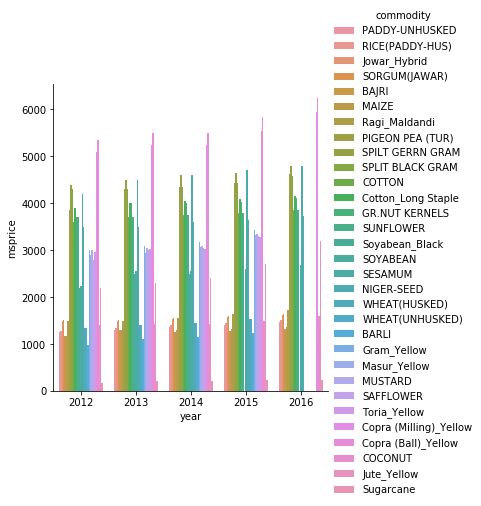

In [10]:
#plotting the msprice per year of each commodity 
import seaborn as sns
sns.catplot(x='year', y='msprice', hue='commodity', kind="bar", data = msp_mandi)

In [11]:
#removing the state_name and district name beacuse we only need APMC name
monthly_data = monthly_data.iloc[:, 0:-2]
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04


In [12]:
#converting the index to datetime
monthly_data.index = monthly_data.date
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date
date,,,,,,,,,
2015-04,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04
2016-04,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04
2015-04,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04
2016-04,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04
2015-04,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04


In [13]:
#removing the date, year and month column 
monthly_data = monthly_data.iloc[:, 0:-1]
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price
date,,,,,,,,
2015-04,Ahmednagar,Bajri,2015,April,79,1406,1538,1463
2016-04,Ahmednagar,Bajri,2016,April,106,1788,1925,1875
2015-04,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731
2016-04,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999
2015-04,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900


In [14]:
#sorting the commodities according to date 
monthly_data = monthly_data.sort_values(by = ['date'])

In [15]:
#because "AMBAT CHUKA" is same as "Ambat Chuka"
monthly_data['Commodity'] = monthly_data['Commodity'].replace(['AMBAT CHUKA', 'Ambat Chuka'], 'Ambat chuka')

In [16]:
monthly_data.Commodity.value_counts()

Gram                3972
Wheat(Husked)       3946
Sorgum(Jawar)       3560
Soybean             3545
Pigeon Pea (Tur)    3389
                    ... 
FIG                    1
MALE LAMB              1
LEAFY VEGETABLE        1
BUFFALO                1
BHAGAR/VARI            1
Name: Commodity, Length: 351, dtype: int64

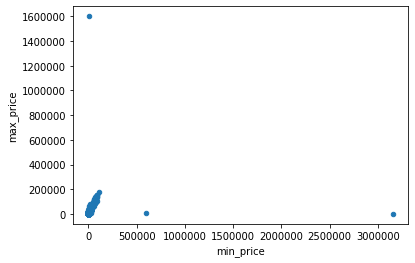

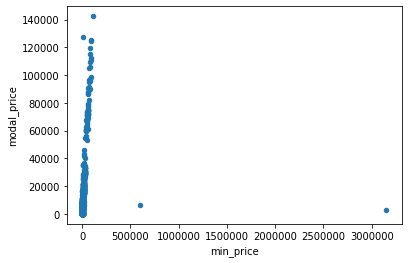

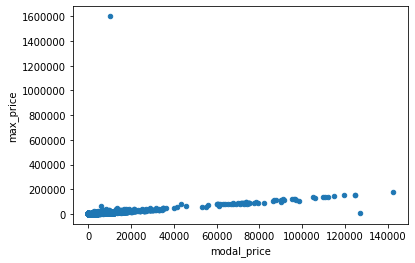

In [17]:
#plotting scatter_plots of the following variables: min_price,max_price and modal_price to find OUTLIARS
ax1 = monthly_data.sort_values(by=['Commodity']).plot.scatter(x = 'min_price', y = 'max_price')
ax2 = monthly_data.sort_values(by=['Commodity']).plot.scatter(x = 'min_price', y = 'modal_price')
ax3 = monthly_data.sort_values(by=['Commodity']).plot.scatter(x = 'modal_price', y = 'max_price')

In [18]:
#REMOVING THE OUTLIARS ON THE BASIS OF ABOVE SCATTERPLOTS 
monthly_data_cleaned = monthly_data[(monthly_data.min_price <= 500000) & (monthly_data.max_price <= 1400000)]
monthly_data_cleaned.shape

(62426, 8)

In [19]:
monthly_data.shape

(62429, 8)

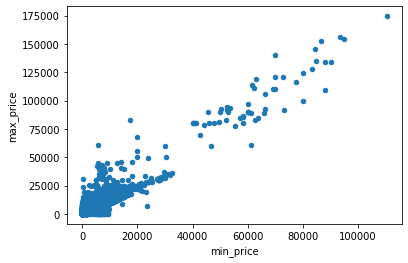

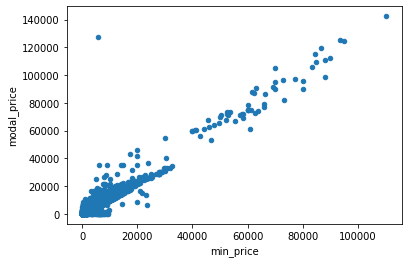

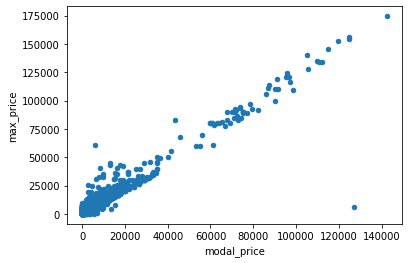

In [20]:
#Plotting the sactterplots after removing outliars
ax1 = monthly_data_cleaned.sort_values(by=['Commodity']).plot.scatter(x = 'min_price', y = 'max_price')
ax2 = monthly_data_cleaned.sort_values(by=['Commodity']).plot.scatter(x = 'min_price', y = 'modal_price')
ax3 = monthly_data_cleaned.sort_values(by=['Commodity']).plot.scatter(x = 'modal_price', y = 'max_price')


In [21]:
monthly_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price
date,,,,,,,,
2014-09,Kurdwadi,Sorgum(Jawar),2014,September,454,1353,2610,1981
2014-09,Satara,Ladies Finger,2014,September,128,2435,3261,2848
2014-09,Satara,Potato,2014,September,2988,2175,2488,2331
2014-09,Satara,Ginger (Fresh),2014,September,199,3438,4813,4125
2014-09,Satara,Ground Nut Pods (Dry),2014,September,1,3000,4000,3500


In [22]:
#exporting the required DataFrame into a new CSV file
monthly_data_cleaned.to_csv('monthly_data_cleaned.csv')